In [1]:
# Import libraries
from sklearn import datasets, svm
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

df = pd.read_csv('../data/preprocessed.csv').iloc[:,1:]

# Scale data
scaler = StandardScaler()
for i in range(5):
    df.iloc[:,i] = scaler.fit_transform(df.iloc[:,i].values.reshape(-1,1))

In [2]:
# Read oversampled_data.csv
oversampled_data = pd.read_csv('../data/oversampled_data.csv')
# # Prepare data for training
X = oversampled_data.drop('Machine failure', axis=1).values
y = oversampled_data['Machine failure'].values
# Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1) 

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
    max_depth=3, random_state=0).fit(X_train, y_train)

### Apply to train

True Negative rate (specificity):  0.9999813571961222
True positive rate (recall):  0.9980510033215295
False Negative Rate:  0.0019489966784704826
False positive rate:  1.86428038777553e-05
Positive Likelihood ratio:  512.0845070422536


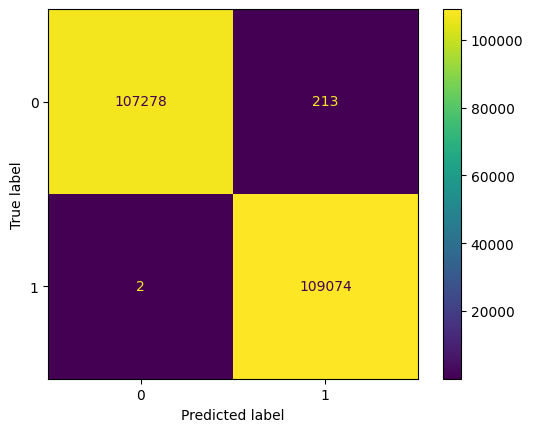

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=20)
clf = clf.fit(X_train, y_train)

cm = confusion_matrix(clf.predict(X_train), y_train)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

### Apply to test

True Negative rate (specificity):  0.9977037887485649
True positive rate (recall):  0.9967576728934084
False Negative Rate:  0.003242327106591558
False positive rate:  0.0022962112514350874
Positive Likelihood ratio:  307.42045454545456


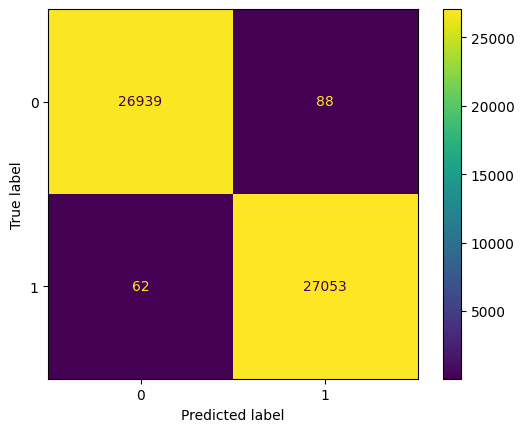

In [8]:
cm = confusion_matrix(clf.predict(X_test), y_test)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

In [9]:
# Save model with pickle
import pickle
import os
models_dir = '..\models'

# Save model
filename = 'xgboost.sav'
pickle.dump(clf, open(os.path.join(models_dir,filename), 'wb'))